# DuckLake Data Dashboard

This notebook visualizes visits and search logs data from the DuckLake pipeline using the generated CSV reports. It uses pandas and plotly for interactive analysis.

---

## 1. Set Up Jupyter Notebook Environment

To launch Jupyter Notebook, run the following command in your terminal from the project directory:

```
jupyter notebook
```

Navigate to this notebook file to begin exploring your data.

## 2. Import Required Libraries

We'll use pandas for data manipulation and plotly for interactive visualizations.

In [2]:
# Import libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path

## 3. Load Data from Reports

Read the generated CSV reports into pandas DataFrames for analysis and visualization.

In [3]:
# Define report paths
reports_dir = Path('reports')
daily = pd.read_csv(reports_dir / 'visits_pages_daily.csv', parse_dates=['dt'])
monthly = pd.read_csv(reports_dir / 'visits_pages_monthly.csv')
weekly = pd.read_csv(reports_dir / 'visits_pages_weekly.csv')
wow = pd.read_csv(reports_dir / 'visits_pages_wow.csv')
searches = pd.read_csv(reports_dir / 'searches_daily.csv')

## 4. Visualize Daily Visits

Plot the time series of daily page visits.

In [4]:
# Plot daily visits
daily_fig = px.line(daily, x='dt', y='cnt', title='Daily Page Visits', labels={'dt': 'Date', 'cnt': 'Visits'})
daily_fig.show()

## 5. Visualize Monthly and Weekly Visits

Bar charts for monthly and weekly page visits.

In [13]:
# Monthly visits
monthly['yyyymm'] = monthly['yyyymm'].astype(str)  # Ensure categorical x-axis
monthly_fig = px.bar(monthly, x='yyyy-mm', y='cnt', title='Monthly Page Visits', labels={'yyyy-mm': 'Year-Month', 'cnt': 'Visits'})
monthly_fig.show()

# Weekly visits
weekly_fig = px.bar(weekly, x='iso_week', y='cnt', title='Weekly Page Visits', labels={'iso_week': 'ISO Week', 'cnt': 'Visits'})
weekly_fig.show()

## 6. Visualize Week-over-Week Change

Line and bar chart for week-over-week change in visits.

In [6]:
# Week-over-week change
wow_fig = go.Figure()
wow_fig.add_trace(go.Bar(x=wow['iso_week'], y=wow['delta'], name='Delta', marker_color='orange'))
wow_fig.add_trace(go.Scatter(x=wow['iso_week'], y=wow['pct_change'], name='Percent Change', yaxis='y2', mode='lines+markers'))
wow_fig.update_layout(
    title='Week-over-Week Change in Visits',
    xaxis_title='ISO Week',
    yaxis=dict(title='Delta'),
    yaxis2=dict(title='Percent Change (%)', overlaying='y', side='right'),
    legend=dict(x=0.01, y=0.99)
)
wow_fig.show()

## 7. Top Search Queries

Visualize the most popular search queries from the search logs.

In [7]:
# Top search queries
# Aggregate across all days
search_top = searches.groupby('query', as_index=False)['cnt'].sum().sort_values('cnt', ascending=False).head(20)
px.bar(search_top, x='query', y='cnt', title='Top 20 Search Queries', labels={'query': 'Query', 'cnt': 'Count'}).show()

## 8. Weekly Search Volume
Visualize the number of searches made per week, going back as far as data is available.

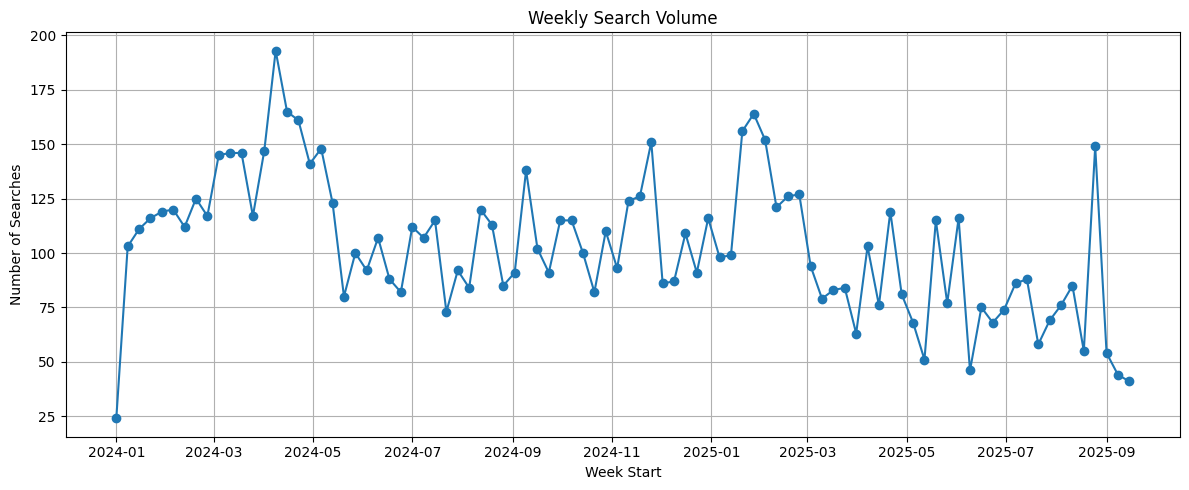

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the weekly search report
df_weekly = pd.read_csv('reports/searches_weekly.csv')

# Convert iso_week to a datetime representing the start of the week
df_weekly['week_start'] = pd.to_datetime(df_weekly['iso_week'] + '-1', format='%G-W%V-%u')

plt.figure(figsize=(12, 5))
plt.plot(df_weekly['week_start'], df_weekly['search_count'], marker='o')
plt.title('Weekly Search Volume')
plt.xlabel('Week Start')
plt.ylabel('Number of Searches')
plt.grid(True)
plt.tight_layout()
plt.show()